This file creates a model based on MAL dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [47]:
mal_df = pd.read_pickle('mal_first50a_mvp.pkl')

In [48]:
mal_df.head(10)

,Title,URL,English,Japanese,Type,Episodes,Status,Aired,Producers,Licensors,...,Alternative version,Synonyms,Premiered,Broadcast,Adaptation,Other,Prequel,Parent story,Side story,Spin-off
0,A Brightening Life,https://myanimelist.net/anime/40628/A_Brighten...,A brightening life,A brightening life,Movie,1.0,Finished Airing,2010,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Christmas Song,https://myanimelist.net/anime/39086/A_Christma...,A Christmas Song,A Christmas Song,Music,1.0,Finished Airing,"Nov 29, 2012",[Avex Entertainment],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A Kite,https://myanimelist.net/anime/320/A_Kite,Kite,A KITE（カイト）,OVA,2.0,Finished Airing,"Feb 25, 1998 to Oct 25, 1998","[Green Bunny, BEAM Entertainment]",[Media Blasters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A Log Day of Timbre,https://myanimelist.net/anime/38712/A_Log_Day_...,A Log Day of Timbre,A Log Day of Timbre,ONA,1.0,Finished Airing,"Feb 25, 2011",[],[],...,[Timbre A to Z],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A New Journey,https://myanimelist.net/anime/39057/A_New_Journey,NaN,A New Journey,ONA,1.0,Finished Airing,"Jan 18, 2019",[],[],...,NaN,Season 2019: A New Journey | League of Legends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A Piece of Phantasmagoria,https://myanimelist.net/anime/6094/A_Piece_of_...,NaN,a piece of PHANTASMAGORIA (ア・ピース・オブ ファンタスマゴリア),OVA,15.0,Finished Airing,1995,[Tamura Shigeru Studio],[],...,"[Kujira no Chouyaku, Ginga no Uo Ursa Minor Blue]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A Play,https://myanimelist.net/anime/29902/A_Play,NaN,A PLAY,Music,1.0,Finished Airing,2011,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A Smart Experiment,https://myanimelist.net/anime/30214/A_Smart_Ex...,NaN,A smart experiment,Special,1.0,Finished Airing,2006,[],[],...,NaN,A Small Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A Tang Qi Yu,https://myanimelist.net/anime/37180/A_Tang_Qi_Yu,Tea Pets,阿唐奇遇,Movie,1.0,Finished Airing,"Jul 21, 2017",[],[],...,NaN,"Atang Qiyu, Atang Qi Yu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A Woman in a Fashion Building,https://myanimelist.net/anime/37452/A_Woman_in...,NaN,A WOMAN IN A FASHION BUILDING,Movie,1.0,Finished Airing,2015,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                50 non-null     object        
 1   URL                  50 non-null     object        
 2   English              27 non-null     object        
 3   Japanese             50 non-null     object        
 4   Type                 50 non-null     object        
 5   Episodes             48 non-null     float64       
 6   Status               50 non-null     object        
 7   Aired                50 non-null     object        
 8   Producers            50 non-null     object        
 9   Licensors            50 non-null     object        
 10  Studios              50 non-null     object        
 11  Source               50 non-null     object        
 12  Genres               50 non-null     object        
 13  Duration             50 non-null     

In [50]:
mal_df.columns

Index(['Title', 'URL', 'English', 'Japanese', 'Type', 'Episodes', 'Status',
       'Aired', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members',
       'Favorites', 'Started', 'Voters', 'Ended', 'Character', 'Sequel',
       'Alternative version', 'Synonyms', 'Premiered', 'Broadcast',
       'Adaptation', 'Other', 'Prequel', 'Parent story', 'Side story',
       'Spin-off'],
      dtype='object')

In [51]:
mal_df['Type'].value_counts()

OVA        14
TV         14
Special     8
Movie       8
ONA         3
Music       3
Name: Type, dtype: int64

In [52]:
mal_df_typedummy = pd.get_dummies(mal_df['Type'], drop_first=True)

In [53]:
mal_df_typedummy.columns

Index(['Music', 'ONA', 'OVA', 'Special', 'TV'], dtype='object')

In [54]:
mal_eda_df = pd.concat([mal_df, mal_df_typedummy], axis=1)

In [55]:
mal_eda_df.head(5)

,Title,URL,English,Japanese,Type,Episodes,Status,Aired,Producers,Licensors,...,Other,Prequel,Parent story,Side story,Spin-off,Music,ONA,OVA,Special,TV
0,A Brightening Life,https://myanimelist.net/anime/40628/A_Brighten...,A brightening life,A brightening life,Movie,1.0,Finished Airing,2010,[],[],...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,A Christmas Song,https://myanimelist.net/anime/39086/A_Christma...,A Christmas Song,A Christmas Song,Music,1.0,Finished Airing,"Nov 29, 2012",[Avex Entertainment],[],...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2,A Kite,https://myanimelist.net/anime/320/A_Kite,Kite,A KITE（カイト）,OVA,2.0,Finished Airing,"Feb 25, 1998 to Oct 25, 1998","[Green Bunny, BEAM Entertainment]",[Media Blasters],...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
3,A Log Day of Timbre,https://myanimelist.net/anime/38712/A_Log_Day_...,A Log Day of Timbre,A Log Day of Timbre,ONA,1.0,Finished Airing,"Feb 25, 2011",[],[],...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
4,A New Journey,https://myanimelist.net/anime/39057/A_New_Journey,NaN,A New Journey,ONA,1.0,Finished Airing,"Jan 18, 2019",[],[],...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0


In [56]:
mal_eda_df['Rating'].value_counts()

PG-13 - Teens 13 or older         26
G - All Ages                      13
R+ - Mild Nudity                   5
R - 17+ (violence & profanity)     3
Rx - Hentai                        2
PG - Children                      1
Name: Rating, dtype: int64

In [57]:
mal_rating_map = {  'G - All Ages': 0,
                    'PG - Children': 1,
                    'PG-13 - Teens 13 or older': 2,
                    'R - 17+ (violence & profanity)': 3,
                    'R+ - Mild Nudity': 4,
                    'Rx - Hentai': 5}

In [58]:
mal_eda_df['Rating score'] = mal_df['Rating'].replace(mal_rating_map)

In [59]:
mal_eda_df['Total length'] = mal_df['Episodes'] * mal_df['Duration']

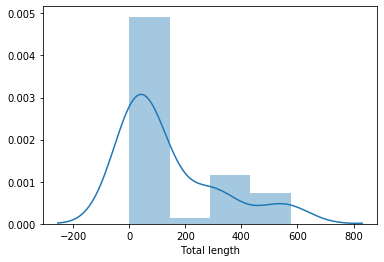

In [60]:
sns.distplot(mal_eda_df['Total length']);

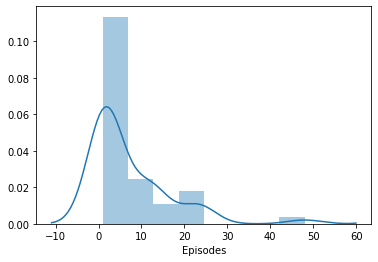

In [61]:
sns.distplot(mal_eda_df['Episodes']);

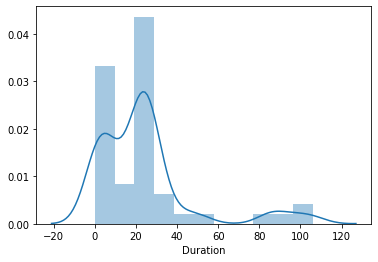

In [62]:
sns.distplot(mal_eda_df['Duration']);

In [63]:
mal_columns = ['Score', 'TV', 'OVA', 'Total length', 'Members', 'Rating score', 'Favorites']

In [64]:
mal_df_tvonly = mal_eda_df[mal_eda_df.TV == 1]

In [65]:
mal_df_mvp = mal_eda_df[mal_columns]

In [66]:
mal_df_mvp.head(5)

,Score,TV,OVA,Total length,Members,Rating score,Favorites
0,NaN,0,0,8.0,102,1,1
1,NaN,0,0,5.0,187,0,0
2,6.60,0,1,52.0,42405,5,190
3,5.15,0,0,2.0,385,0,0
4,6.43,0,0,1.0,1313,2,5


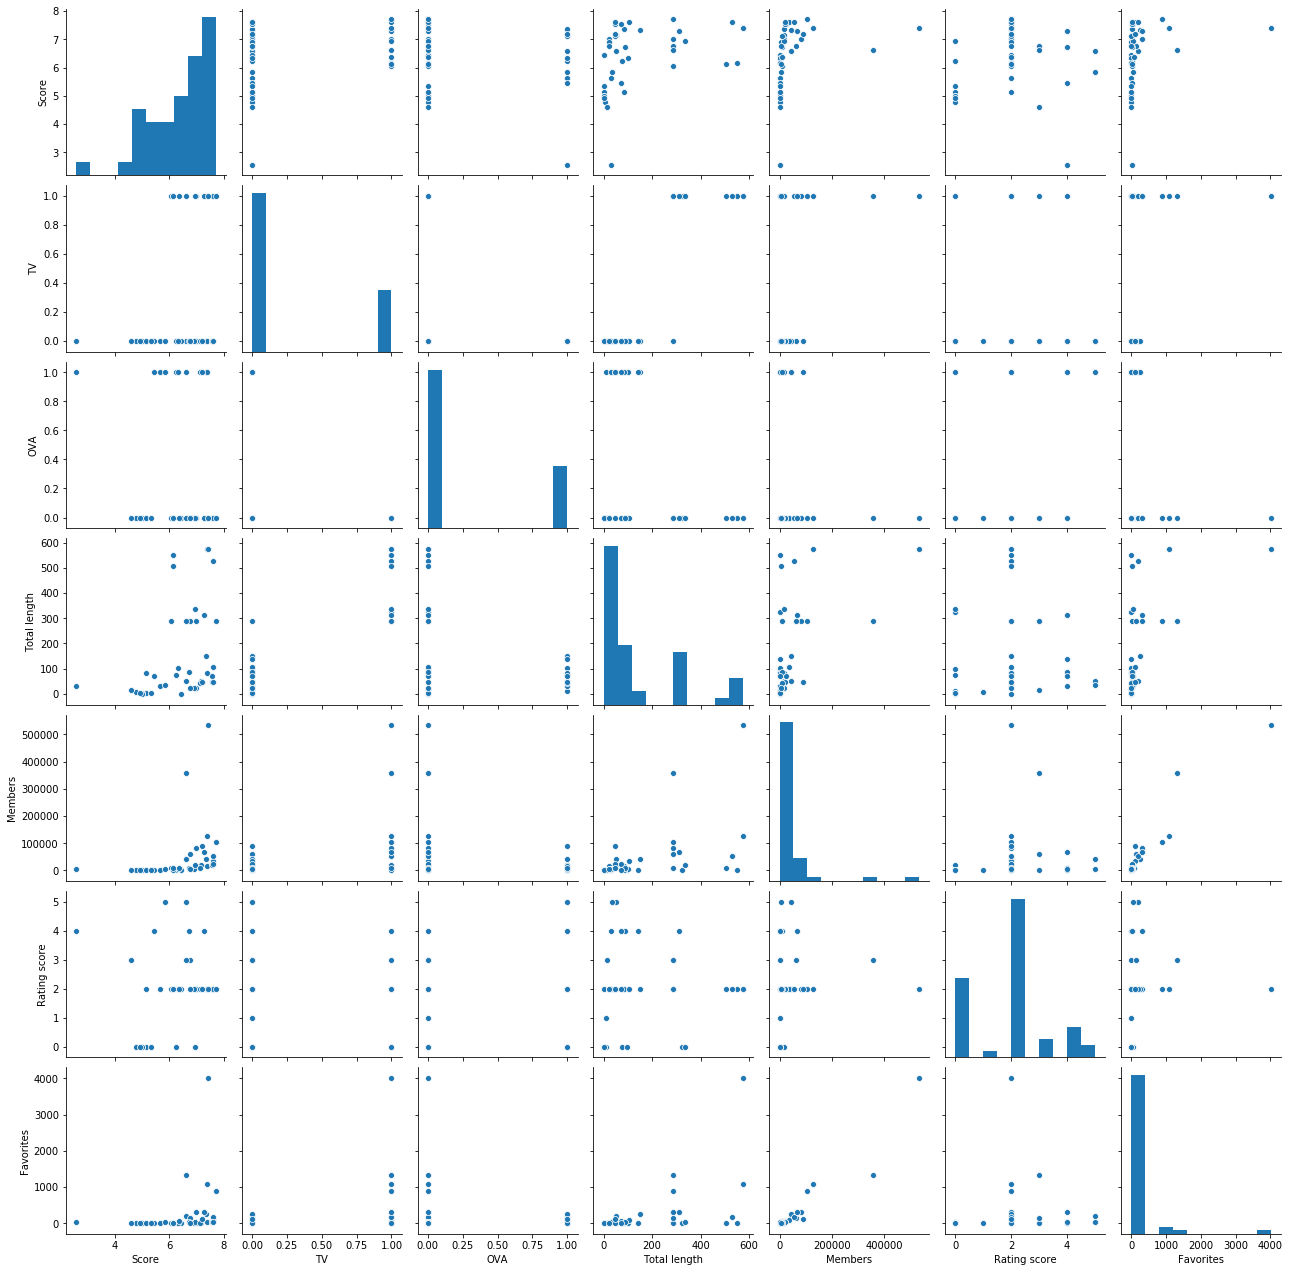

In [67]:
sns.pairplot(mal_df_mvp)